
# Project: Investigate a Dataset for TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will iinvestigate and analize TMDB movie data to answer the following questions:
>Which genres are most popular from year to year?
> What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
def get_mean(year, column):
     m = df[df.release_year == year][column].mean()
     return m
def get_max(year, column):
     x = df[df.release_year == year][column].max()
     return x
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


### Data Cleaning 

In [3]:
#first here we drop any null values at data set
#second we calculated the mean of budget and revenue then we replaced any zero values at the budget and revenue with
#the mean of them like you asked at first review and we show the first 20 rowes of data
#There is a problem at release_year the python showed it as float data type despite of I do not do anything
#for it so that I converted it to integer using (astype()) but the python still can not read it as int
df.dropna(inplace=True)
df['release_year']=df['release_year'].astype(int)
m1=df['budget'].mean()
m2=df['revenue'].mean()
df[df.budget==0]=m1
df[df.revenue==0]=m2
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397.0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,76341.0,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,262500.0,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,140607.0,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,168259.0,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09
5,281957.0,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929.0,7.2,2015.0,1.241999e+08,4.903142e+08
6,87101.0,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598.0,5.8,2015.0,1.425999e+08,4.053551e+08
7,286217.0,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572.0,7.6,2015.0,9.935996e+07,5.477497e+08
8,211672.0,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09
9,150540.0,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,.

<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

In [7]:
#Here we need the most popular film at each year so that we will look at the popularity and we will group it by release year
#and we will show the genres to the max popularity at each year

df.groupby('release_year')['revenue'].mean()

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.844587e+07
1968    6.788025e+06
1969    7.869583e+06
1970    1.366395e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.728808e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.825584e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.510023e+07
1985    2.638323e+07
1986    2.481635e+07
1987    2.769684e+07
1988    2.579001e+07
1989    3.770017e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.570040e+07
1993    3.907388e+07
1994    3.856212e+07
1995    5.232195e+07
1996    4.074261e+07
1997    5.549569e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.836432e+07
2001    5.541357e+07
2002    5.505120e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.537592e+07
2006    3.989152e+07


###  What kinds of properties are associated with movies that have high revenues?

In [5]:
# I defined that high revenue is the revenue bigger than the average so that I calcualated the average by mean function
#and I made a query ti define new data frame with high revenue and group it by Keywords which refer to the properties of the film 
x=df['revenue'].mean()
df_m=df.query("revenue>{0}".format(x))
df_m.groupby('keywords').revenue.max()

keywords
1970s|mutant|time travel|marvel comic|based on comic book              746000000.0
adolescence|based on novel|loss of child|fight|chase                   222231186.0
adoptive father|orphanage|life's dream|rival|stealing                  543513985.0
adultery|coming out|loss of father|first time|camcorder                356296601.0
africa|brain tumor|wife husband relationship|casual meeting|pyramid    175372502.0
                                                                          ...     
witch|magic|mummy|dracula|skeleton                                     358375603.0
witch|sister sister relationship|sequel|prequel|haunting               205703818.0
witch|voodoo|legend|sorcery|maryland                                   248000000.0
world war ii|nazis|art theft|post world war ii                         154984035.0
world war i|horse|farm life|execution|trapped                          177584879.0
Name: revenue, Length: 476, dtype: float64

Text(0.5, 1.0, 'The distrubtion budget at the last five years')

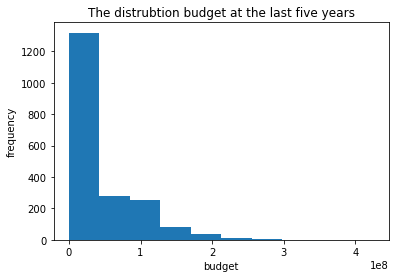

In [6]:
#this a histogram that shown the distribution of the budget and the shape of data
plt.hist(df['budget'])
plt.xlabel("budget")
plt.ylabel("frequency")
plt.title("The distrubtion budget at the last five years")



this a histogram that shown the distribution of the budget and the shape of data 


Text(0.5, 1.0, 'The distrubtion revenue at the last five years')

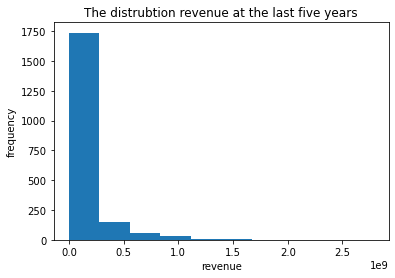

In [7]:
#this a histogram that shown the distribution of the revenue
plt.hist(df['revenue'])
plt.xlabel("revenue")
plt.ylabel("frequency")
plt.title("The distrubtion revenue at the last five years")

this a histogram that shown the distribution of the revenue and the shape of revenue data


Text(0.5, 1.0, 'The mean budget at the last five years')

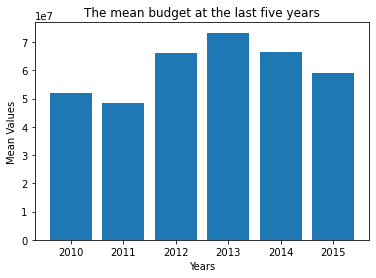

In [8]:
#We calculated the mean of budget at last five yeares using the function we defined it
#This visualization is a correlation between the means at last five years so that we can compare them easily and know 
#which year have a high budget
m_2010=get_mean(2010, 'budget')
m_2011=get_mean(2011, 'budget')
m_2012=get_mean(2012, 'budget')
m_2013=get_mean(2013, 'budget')
m_2014=get_mean(2014, 'budget')
m_2015=get_mean(2015, 'budget')

plt.bar(["2010","2011","2012","2013","2014","2015"],[m_2010,m_2011,m_2012,m_2013,m_2014,m_2015])
plt.xlabel("Years")
plt.ylabel("Mean Values")
plt.title("The mean budget at the last five years")


This bar shown that the mean of budget at the last five years 
you can compare them esily when you look at visualization

Text(0.5, 1.0, 'The distrubtion of popularity ')

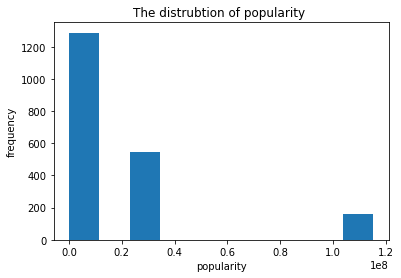

In [9]:
#this a histogram that shown the distribution of the popularity to see how the popularity is going on and know the shape
#of popularity
plt.hist(df['popularity'])
plt.xlabel("popularity")
plt.ylabel("frequency")
plt.title("The distrubtion of popularity ")

This a histogram that shown the distrubtion of popularity and the shape of data

### what is the most popularity film at each year?

In [10]:
#we need the most popular film at each year so we group it by release year and calculated the max of popularity at each year an
#show it by the original title
df.groupby('release_year')['original_title'].max('popularity')

release_year
1.961000e+03                         One, Two, Three
1.962000e+03                                  Dr. No
1.963000e+03                   From Russia With Love
1.964000e+03                              Goldfinger
1.965000e+03                             Thunderball
1.967000e+03                     You Only Live Twice
1.969000e+03         On Her Majesty's Secret Service
1.971000e+03                   The Last Picture Show
1.972000e+03                           The Godfather
1.973000e+03                            The Exorcist
1.974000e+03             The Man with the Golden Gun
1.975000e+03           The Rocky Horror Picture Show
1.977000e+03                    The Spy Who Loved Me
1.978000e+03                               Halloween
1.979000e+03                                Phantasm
1.980000e+03                                 The Fog
1.981000e+03                   The Fox and the Hound
1.982000e+03                               The Thing
1.983000e+03                     

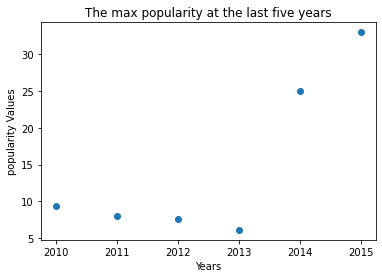

In [11]:
#We calculated the max of popularity at last five yeares using the function we defined it
#This visualization is a correlation between the max popularity at last five years so that we can compare them easily
p_2010=get_max(2010,'popularity')
p_2011=get_max(2011,'popularity')
p_2012=get_max(2012,'popularity')
p_2013=get_max(2013,'popularity')
p_2014=get_max(2014,'popularity')
p_2015=get_max(2015,'popularity')

plt.scatter(["2010","2011","2012","2013","2014","2015"],[p_2010,p_2011,p_2012,p_2013,p_2014,p_2015])
plt.xlabel("Years")
plt.ylabel("popularity Values")
plt.title("The max popularity at the last five years")
plt.show()

This scatter visualization shown that the max  of values popularity at the last five years 
you can compare them esily when you look at visualization

## Conclusions

> This is a data set talked about films and all information about the film and I had 3 questions to answer about it 
>We answered the first one and we have our output The release year and the genre of the film beside it 
>and we answered the seconde by considered that the key words is the properties of the film and any film have revenue bigger than the average revenue is high revenue.
>and in the third question he need the most popular film at each year so that we showed the year and the most popular film(original title)beside it 

limitations:-
>When I begin to clean data I found that there is many zeros at revenue and budget.
> and I replaced this zeros with the mean of each column
>>Is there is something better than doing this?